<a href="https://colab.research.google.com/github/samuel1sm/ArvoreAvl/blob/master/extra%C3%A7%C3%A3o%20de%20arquivos/IndentifyCNH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!apt-get install tesseract-ocr tesseract-ocr-por
!apt-get install python-dev python3-dev build-essential liblcms2-dev zlib1g-dev libtiff5-dev libjpeg8-dev libfreetype6-dev libwebp-dev
!pip install Pillow
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd tesseract-ocr-por
0 upgraded, 4 newly installed, 0 to remove and 11 not upgraded.
Need to get 5,650 kB of archives.
After this operation, 17.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-por all 4.00~git24-0e00fe6-1.2 [856 kB]
Fetched 5,650 kB in 1s (5,313 kB/s)
Selecting previously unselected

In [ ]:
 import shutil
 shutil.rmtree('/imgs', ignore_errors=True)

!ln -s "/content/gdrive/My Drive/Datasets/ProjetoMPCE/TestDataset/documentos/cnh" imgs
if not os.path.exists("dataset"):
  os.mkdir("dataset")

In [ ]:
import glob 
images_path = glob.glob("imgs/*")

In [ ]:
def biggestContour(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 5000:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) >= 4:
                # print(approx)
                biggest = np.array(approx).reshape(len(approx), 2).tolist()
                max_area = area

    if len(biggest)>=4:
        biggest.sort(key=lambda x : x[0])
        t=[biggest.pop(0),biggest.pop(-1)]
        width = t[1][0] - t[0][0]

        biggest.sort(key=lambda x : x[1])
        t.append(biggest.pop(0))
        t.append(biggest.pop(-1))


        t.sort(key=lambda x : x[1])
        t1=[t.pop(0)]
        t1.append(t.pop(0))
        t1.sort(key=lambda x : x[0])
        t.sort(key=lambda x : x[0])
        
        biggest = [t1[0],t1[1],t[0],t[1]]

        t.sort(key=lambda x : x[1])
        height = t[-1][1] - t1[0][1]

        # print(biggest)

    return biggest,width,height

In [ ]:
def dots(img,dots,ratio=1):
    for i in dots:
        print(i)
        p1,p2=i
        img = cv2.circle(img,(int(p1/ratio),int(p2/ratio)), 3, (0,0,255), thickness=3)
    # cv2_imshow(imutils.resize(img , height = 800))

In [ ]:
def four_point_transform(image, pts):
	# obtain a consistent order of the points and unpack them
	# individually
	#rect = order_points(pts)
	(tl, tr, br, bl) = pts
	# compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	# compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	# now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left
	# order
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	# compute the perspective transform matrix and then apply it
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
	# return the warped image
	return warped

In [ ]:
def plot_image_list(images, fig_size = (13, 13), columns = 4):
  fig=plt.figure(figsize=fig_size)
  rows = int(len(images)/columns) + 1
  for i,image in enumerate(images):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(rows,columns,i + 1)
    plt.imshow(img)
  
  plt.show()


In [ ]:
def find_corner_points(points):
  x,y,w,h = cv2.boundingRect(points)
  return x,y,x+w,y+h


In [ ]:
from skimage.filters import threshold_local
import numpy as np
import cv2
import imutils
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt


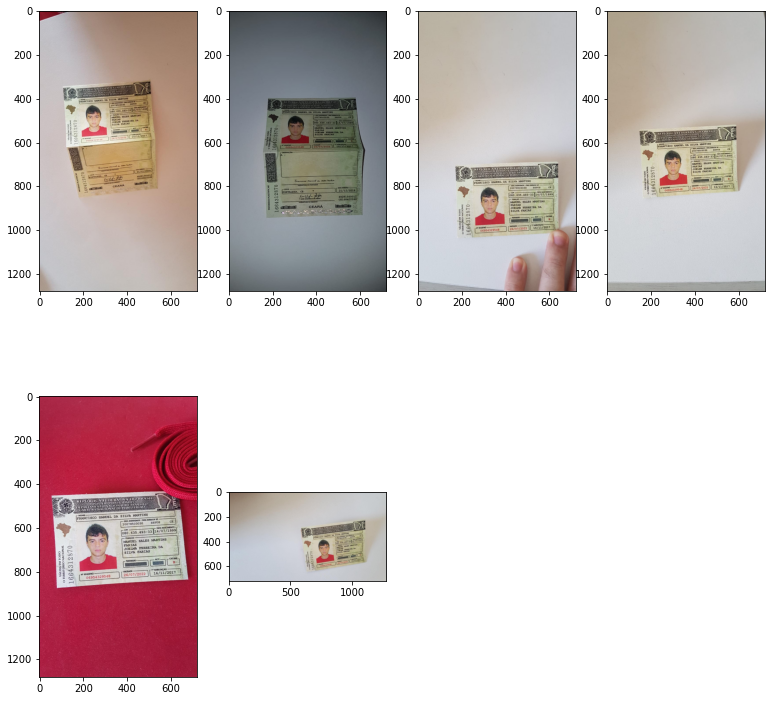

In [ ]:
plot_image_list(images_path)

STEP 1: Edge Detection


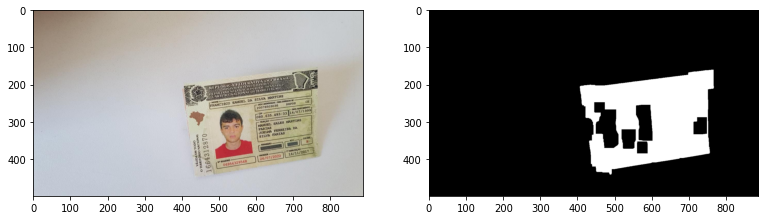

[586, 294]
[1103, 231]
[649, 625]
[1088, 554]
STEP 3: Apply perspective transform


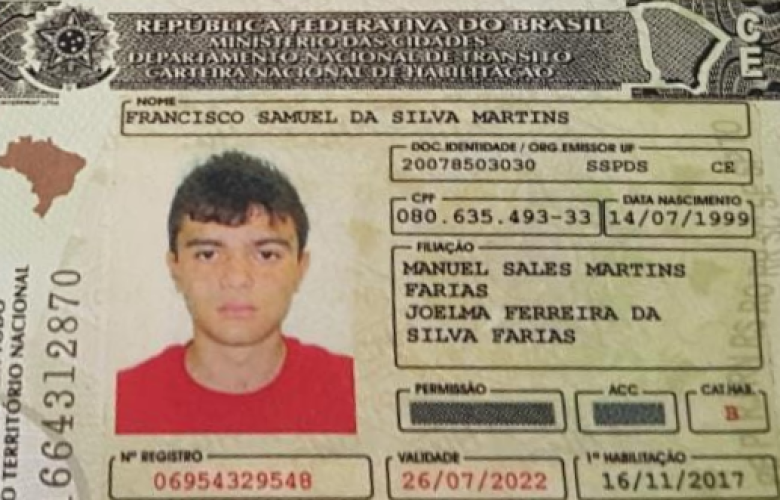

In [ ]:

fig=plt.figure(figsize=(13, 13))

plt.subplot(1,2,1)

pathImage = images_path[5]  # ok

orig  = cv2.imread(pathImage)

plt.imshow(imutils.resize(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB), height = 500))

plt.subplot(1,2,2)

ratio = orig.shape[0] / 500.0
heightImg = orig.shape[0]
widthImg =  orig.shape[1]

img = orig.copy()
image = orig.copy()


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray,1, 200)
kernel = np.ones((5,5))
img_dilation = cv2.dilate(edged, kernel, iterations=9)
img_erosion = cv2.erode(img_dilation, kernel, iterations=9) 
# edged = cv2.Canny(img_erosion,75, 200)
edged = img_erosion
# show the original image and the edge detected image
print("STEP 1: Edge Detection")
plt.imshow(imutils.resize(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB), height = 500))
plt.show()


contours, hierarchy = cv2.findContours(img_erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img= cv2.drawContours(img, contours, -1, (0, 255, 0), 20)

# cv2_imshow(img)

biggest,new_width, new_height = biggestContour(contours)
dots(imutils.resize(img, height = 500),biggest,ratio)
# print(new_width, new_height)

pts1 = np.float32(biggest) # PREPARE POINTS FOR WARP


pts2 = np.float32([[0, 0],[new_width, 0], [0, new_height],[new_width, new_height]]) # PREPARE POINTS FOR WARP
matrix = cv2.getPerspectiveTransform(pts1, pts2)
warped = cv2.warpPerspective(orig, matrix, (new_width, new_height))

if warped.shape[0] / warped.shape[1] > 1:
  warped = warped[: int(warped.shape[1]/1.75), :warped.shape[0] ]

# pts2 = np.float32([[0, 0],[heightImg, 0], [0, widthImg],[heightImg, widthImg]]) # PREPARE POINTS FOR WARP
# matrix = cv2.getPerspectiveTransform(pts1, pts2)
# warped = cv2.warpPerspective(orig, matrix, (heightImg,widthImg))


# warped = four_point_transform(orig.copy(), biggest.reshape(4, 2))
print("STEP 3: Apply perspective transform")

final_colored= warped.copy()
cv2_imshow(imutils.resize(final_colored, height = 500))

# cv2_imshow()


STEP 3: Apply 'black and white' paper effect
262 258 377 290


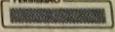

258 164 507 248


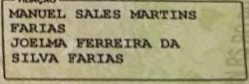

258 131 502 171


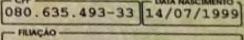

257 97 500 126


0 0 76 73


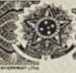

In [ ]:
print("STEP 3: Apply 'black and white' paper effect")
# warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
# T = threshold_local(warped, 11, offset = 10, method = "gaussian")
# warped = (warped > T).astype("uint8") * 255

gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

final_binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,35,2)
final_binary = cv2.dilate(final_binary, kernel, iterations=1)

edged = cv2.Canny(gray,1, 200)
edged = cv2.dilate(edged, (5,5), iterations=2)
edged = cv2.erode(edged, (5,5), iterations=2)



contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
final_colored= warped.copy()
croped_images = []
max_area = 0
areas = []

# for i in contours:
#   a = cv2.drawContours(warped.copy(),[i],0,color = (0,255,0), thickness = 1)
#   cv2_imshow(a)



for i in contours:
    area = cv2.contourArea(i)
    if area > 600 and area <= 14000:

        peri = cv2.arcLength(i, True)
        approx = cv2.approxPolyDP(i, 0.02 * peri, True)
        if 11 >= len(approx) >= 4  :
            # a = cv2.drawContours(warped.copy(),[i],0,color = (0,255,0), thickness = 1)
            # cv2_imshow(a)

           
            x_min,y_min,x_max,y_max = find_corner_points(i)
            print(x_min,y_min,x_max,y_max)
            croped_box = final_colored[ y_min:y_max,x_min:x_max]
            cv2_imshow(croped_box)
            croped_images.append(croped_box)
            areas.append(area)

In [ ]:
def color_filter(img, r, g, b):
    colors = [b, g, r]
    result = np.zeros(img.shape, dtype=np.uint8)
    for i in range(3):
        result[:, :, i] = np.where(img[:, :, i] < colors[i], 0, 255)
    return result.astype(np.uint8)

[[178 183 172 ... 152 145 150]
 [177 132  54 ... 137 119 139]
 [167 104  44 ... 131 111 145]
 ...
 [171 167 180 ...  44  60 100]
 [169 157 161 ... 122 129 143]
 [160 156 153 ... 153 161 162]]
----------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
----------
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
----------


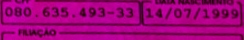

In [ ]:

size = 1000
kernel_sharpening = np.array([  [-1,-1,-1], 
                                [-1, 9,-1],
                                [-1,-1,-1]])

# kernel_sharpening = np.array([  [-1,-1,-1,-1,-1],
#                                 [-1,-1,-1,-1,-1], 
#                                 [-1,-1, 9,-1,-1],
#                                 [-1,-1,-1,-1,-1],
#                                 [-1,-1,-1,-1,-1]])
for ci in croped_images[2:3]:
  proportion = ci.shape[0] / ci.shape[1]

  # ci = color_filter(ci, 255,0, 255)

  # RED, GREEN, BLUE = (2, 1, 0)

  ci = ci.copy()
  ci[:, :, 1] = np.zeros_like(ci[:, :, 1])
  
  # greens = np.zeros_like(greens)

  # mask = (greens < 35) | (reds == reds) | (blues == blues)
  
  print(reds)
  print("----------")
  print(greens)
  print("----------")
  print(mask)
  print("----------")

  # empty_img[mask] = (0,4,4)

  # ci = cv2.filter2D(ci.copy(), -1, kernel_sharpening)

  # if proportion > 1:
  #   resized = cv2.resize(ci, (int(proportion * size) +1, size))
  # else:
  #   resized = cv2.resize(ci, (size,int(proportion * size) +1))

  # canny = cv2.Canny(resized,1, 200)

 
  # ci = cv2.cvtColor(ci.copy(), cv2.COLOR_RGB2BGR)

  cv2_imshow(ci)


(array([3., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 777., 1245., 1713., 2181., 2649., 3117., 3585., 4053., 4521.,
        4989., 5457.]),
 <a list of 10 Patch objects>)

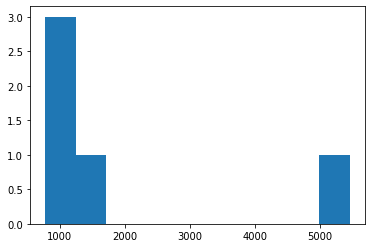

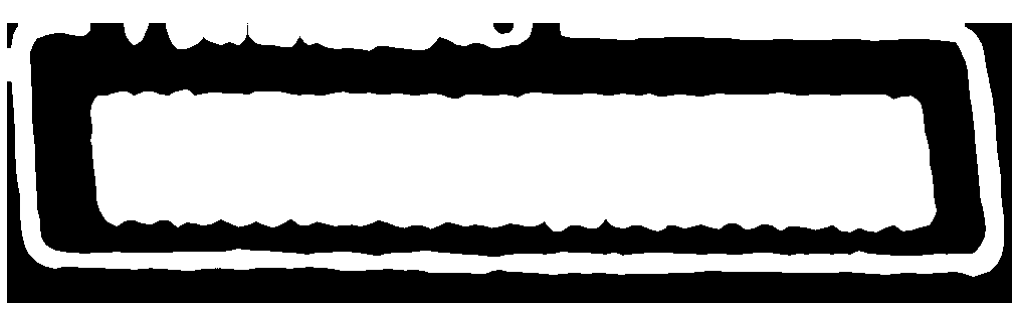

Pandas(Index=9, level=5, page_num=1, block_num=2, par_num=1, line_num=1, word_num=1, left=37, top=36, width=227, height=38, conf=94, text='MANUEL')
Pandas(Index=10, level=5, page_num=1, block_num=2, par_num=1, line_num=1, word_num=2, left=304, top=38, width=180, height=38, conf=94, text='SALES')
Pandas(Index=11, level=5, page_num=1, block_num=2, par_num=1, line_num=1, word_num=3, left=523, top=39, width=265, height=40, conf=96, text='MARTINS')
Pandas(Index=13, level=5, page_num=1, block_num=2, par_num=1, line_num=2, word_num=1, left=43, top=94, width=219, height=39, conf=95, text='FARIAS')
Pandas(Index=17, level=5, page_num=1, block_num=3, par_num=1, line_num=1, word_num=1, left=44, top=153, width=226, height=39, conf=75, text='JOELMA')
Pandas(Index=18, level=5, page_num=1, block_num=3, par_num=1, line_num=1, word_num=2, left=308, top=155, width=303, height=40, conf=96, text='FERREIRA')
Pandas(Index=19, level=5, page_num=1, block_num=3, par_num=1, line_num=1, word_num=3, left=645, top=

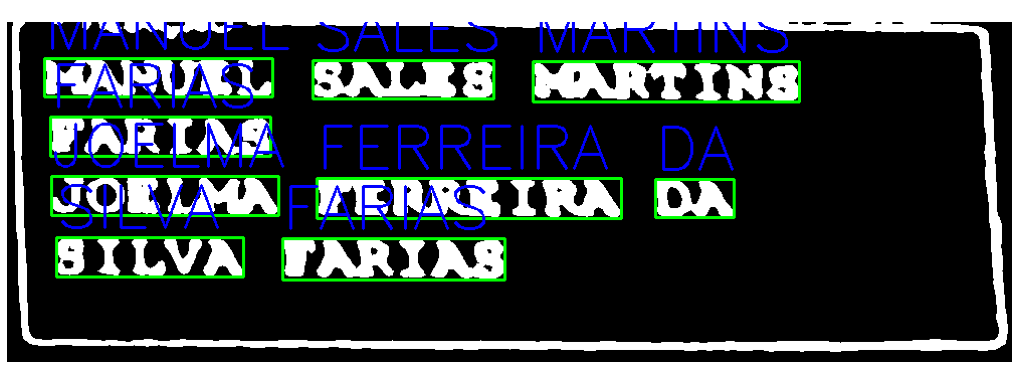

Pandas(Index=9, level=5, page_num=1, block_num=1, par_num=1, line_num=1, word_num=6, left=0, top=0, width=1000, height=164, conf=52, text='ad')
Pandas(Index=12, level=5, page_num=1, block_num=1, par_num=1, line_num=2, word_num=2, left=147, top=30, width=133, height=39, conf=64, text='.635')
Pandas(Index=13, level=5, page_num=1, block_num=1, par_num=1, line_num=2, word_num=3, left=298, top=32, width=248, height=40, conf=60, text='.493-33')
Pandas(Index=14, level=5, page_num=1, block_num=1, par_num=1, line_num=2, word_num=4, left=570, top=3, width=426, height=106, conf=65, text='[24/07/1999]')


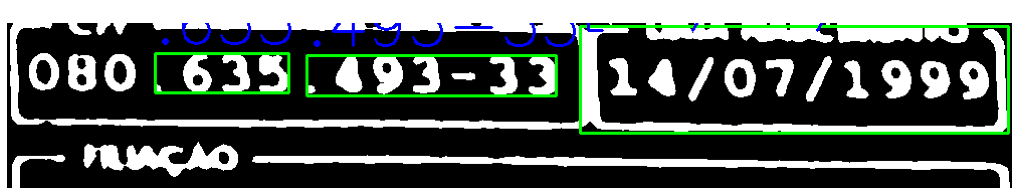

Pandas(Index=15, level=5, page_num=1, block_num=2, par_num=1, line_num=1, word_num=1, left=42, top=33, width=361, height=33, conf=88, text='20078503030')
Pandas(Index=17, level=5, page_num=1, block_num=2, par_num=1, line_num=1, word_num=3, left=883, top=40, width=64, height=33, conf=87, text='ce')


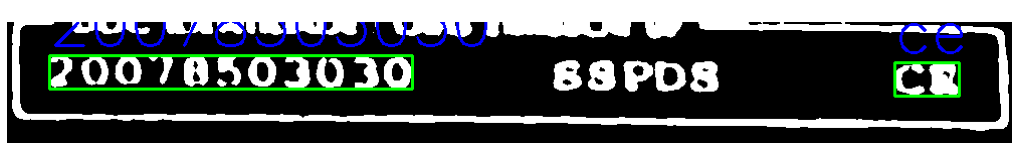

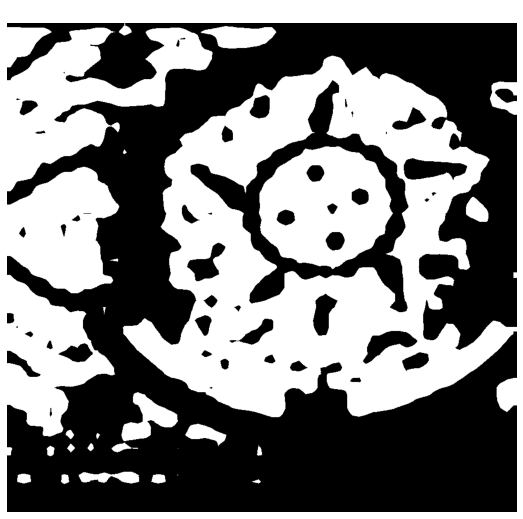

In [ ]:
from PIL import Image # Importando o módulo Pillow para abrir a imagem no script
import pytesseract # Módulo para a utilização da tecnologia OCR
from pytesseract import Output
import matplotlib.pyplot as plt
import pandas as pd

size = 1000
for ci in croped_images:
  results= []
  proportion = ci.shape[0] / ci.shape[1]
  # ci = ci.copy()
  # ci[:, :, 1] = np.zeros_like(ci[:, :, 1])

  # kernel_sharpening = np.array([[-1,-1,-1], 
  #                               [-1, 9,-1],
  #                               [-1,-1,-1]])
  
  # ci = cv2.filter2D(ci.copy(), -1, kernel_sharpening)

  if proportion > 1:
    resized = cv2.resize(ci, (int(proportion * size) +1, size))
  else:
    resized = cv2.resize(ci, (size,int(proportion * size) +1))
  
  
  hsv = cv2.cvtColor(resized, cv2.COLOR_BGR2HSV)
  lower_val = np.array([0,0,0])
  upper_val = np.array([179,255,127])

  mask = cv2.inRange(hsv, lower_val, upper_val)
  mask_inv = cv2.bitwise_not(mask)



  # resized = cv2.adaptiveThreshold(resized.copy(),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
  # resized =  cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
  # resized = cv2.GaussianBlur(resized, (5, 5), 0)
  # resized = cv2.adaptiveThreshold(resized,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
  # resized = cv2.Canny(resized,1, 200)
  # resized = cv2.dilate(resized,(5,5), 20000000000)
  # cv2_imshow(resized)
  # plt.imshow(cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY))

  # final_binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
  # final_binary = cv2.dilate(final_binary, (5, 5), 1)

  img_colored = mask.copy()
  img_colored = cv2.cvtColor(img_colored, cv2.COLOR_BGR2RGB)

  img_binary = final_binary.copy()
  img_binary = cv2.cvtColor(img_binary, cv2.COLOR_BGR2RGB)

  results.append(pytesseract.image_to_data(cv2.cvtColor(img_colored, cv2.COLOR_RGB2GRAY), output_type=Output.DICT, lang="eng+por"))

  # print(results[0]["text"])
  # print(results[1]["text"])
  dados = pd.DataFrame.from_dict(results[0])
  for i in range(1,len(results)):
      dados = pd.concat([dados, pd.DataFrame.from_dict(results[i])], ignore_index=True)
  dados.conf=dados.conf.astype(int)
  dados= dados.query("conf>50")
  bad_chars= [""," ","\n","\t"]
  filtro = dados[dados["text"].apply(lambda x: not ''.join(i for i in x if not i in bad_chars) == "")]
  filtro.reset_index()


  img =  img_colored.copy()
  for results in filtro.itertuples():
      print(results)
      x = results.left
      y = results.top
      w = results.width
      h = results.height

      text = results.text
      conf = int(results.conf)
      if conf >54:
          text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
          cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
          cv2.putText(img, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
              2, (0, 0, 255),2)
          
  plt.figure(figsize=(18,9))
  plt.title("Resultado do OCR:")
  plt.rcParams['text.color'] = "w"
  plt.axis('off')
  plt.imshow(img)
  # cv2_imshow(img)

  plt.show()